# Checking the quality of `GPT`'s annotation

In this notebook, we will check if there are wrong formatting or any issue in the outputs

## Libraries

In [1]:
import pandas as pd
import re 
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Global variables 

In [43]:
ROOT = Path("../../data")
setname = 1
subset_name = f"subset_{setname}"
model_name = "gpt-4o-mini"
CHECKPOINT_CSV = ROOT / "subsets_Di_annotated" / f"{subset_name}_{model_name}.csv"

In [44]:
df = pd.read_csv(CHECKPOINT_CSV, encoding="utf-8")
print(f'Length before dropping NaN: {len(df)}')
df = df.dropna()
print(f'Length after dropping NaN: {len(df)}')
df

Length before dropping NaN: 30000
Length after dropping NaN: 30000


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,conclusion
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,Conclusion : 0
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,Conclusion : 0
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,Conclusion : 0
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,Conclusion : 1
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,Conclusion : 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,Conclusion : 0
29996,anon_msg_316a3c03577c,anon_user_1ae8fdffd0,Tous les poutinolatres seront éliminés\nchouinez,anon_topic_d93eef86,0,0,9,**Sujet du message** : Opposition à un groupe ...,Tons identifiés : \n\n1. **Provocateur** : Aff...,"Catégories : [""Évocation d’un propos toxique a...",**Intentions identifiées :**\n\n1. **Dénoncer*...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 6/10 \nJustification : Propos méprisan...,Conclusion : 1
29997,anon_msg_17472812710a,anon_user_d0c31312c5,"La 6. Les malaises avec Célestin, c'est la base",anon_topic_4b65a426,0,0,1,**Sujet du message** : Les problèmes liés à un...,"Tons perçus : Apathique, Sarcastique.\n\nJusti...","Catégories : [""Banalisation d’une idée toxique...",1. **Informer** (certitude élevée) : \n L'au...,Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 3/10 \nJustification : Le message bana...,Conclusion : 0
29998,anon_msg_ed47091424a3,anon_user_c2e9a8e9b4,"C'est plutôt réussi, la domination de la Chine...",anon_topic_fbb9f701,1,0,5,**Sujet du message** : La domination mondiale ...,Tons perçus : \n\n1. **Sérieux** (certitude él...,"Catégories : [""Évocation d’un propos toxique a...",1. **Informer** (certitude élevée) : L'auteur ...,Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,"Note : 4/10 \nJustification 

## Utility functions

In [45]:
def check_empty_or_nan(df, col):
    return df[col].isna().sum(), (df[col].str.strip() == '').sum()

def extract_label_codes(text):
    """Extract codes like S0/H2/V0/..."""
    return re.findall(r'[SHVRAI]\d', text)

def extract_score(text):
    match = re.search(r'Note\s*:\s*(\d+)/10', text)
    return int(match.group(1)) if match else None

## Field-by-field quality checks

### Explanation (`explication`)

In [46]:
print("=== Check: explication ===")
empty_count, blank_count = check_empty_or_nan(df, "explication")
print(f"Empty: {empty_count}, Blank: {blank_count}")

=== Check: explication ===
Empty: 0, Blank: 0


### Tone (`ton`)

In [47]:
print("\n=== Check: ton ===")
empty_count, blank_count = check_empty_or_nan(df, "ton")
print(f"Empty: {empty_count}, Blank: {blank_count}")


=== Check: ton ===
Empty: 0, Blank: 0


### Intention (`intention`)

In [48]:
print("\n=== Check: explication ===")
empty_count, blank_count = check_empty_or_nan(df, "explication")
print(f"Empty: {empty_count}, Blank: {blank_count}")


=== Check: explication ===
Empty: 0, Blank: 0


### Categorie (`categorie`)

In [49]:
allowed_categories = [
    "critique explicite d’une idée toxique",
    "évocation d’un propos toxique sans adhésion",
    "évocation ambiguë d’un propos toxique",
    "évocation d’un propos toxique avec adhésion",
    "humour à double lecture",
    "bienveillance trompeuse",
    "micro-agression",
    "dog-whistle",
    "manipulation pseudo-rationnelle",
    "ambiguïté forte indécidable",
    "inversion toxique",
    "reformulation toxique indirecte (strawman)",
    "banalisation d’une idée toxique",
    "répétition indirecte ou moquerie passive",
    "toxicité visuelle"
]

In [50]:
print(f'Length before filtering categories: {len(df)}')
# Remove rows that don't contain 'Catégories :' 
df_categories = df[df['categorie'].str.contains("Catégories :")].copy()
print(f'Length after filtering rows that contain "Catégories :": {len(df_categories)}')
# Remove rows that don't contain 'Justification :'
df_categories = df_categories[df_categories['categorie'].str.contains("Justification :")].copy()
print(f'Length after filtering rows that contain "Justification :": {len(df_categories)}')
# Extract categories list
df_categories['categorie_list'] = df_categories['categorie'].apply(
	lambda x: re.findall(r'Catégories :(.*)Justification :', x, re.DOTALL)
)
df_categories['categorie_list'] = df_categories['categorie_list'].apply(
	lambda x: re.findall(r'"([^"]+)"', x[0].strip()) if x else []
)
# Remove categories that are not in the allowed list
df_categories['categorie_list'] = df_categories['categorie_list'].apply(
	lambda x: [cat for cat in x if cat.lower() in allowed_categories]
)
df_categories['categorie_justification'] = df_categories['categorie'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_categories

Length before filtering categories: 30000
Length after filtering rows that contain "Catégories :": 29999
Length after filtering rows that contain "Justification :": 29998


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,conclusion,categorie_list,categorie_justification
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,Conclusion : 0,[],Le message exprime un désintérêt pour la polit...
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,Conclusion : 0,"[Humour à double lecture, Évocation ambiguë d’...",Le ton ironique crée une ambiguïté sur l'adhés...
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,Conclusion : 0,[],Le message exprime de l'enthousiasme et une cr...
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,Conclusion : 1,"[Évocation ambiguë d’un propos toxique, Répéti...",Le message moque une personne en insinuant des...
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,Conclusion : 0,[],Le message demeure trop vague pour contenir de...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,Conclusion : 0,[],Le message exprime un désintérêt sans évoquer ...
29996,anon_msg_316a3c03577c,anon_user_1ae8fdffd0,Tous les poutinolatres seront éliminés\nchouinez,anon_topic_d93eef86,0,0,9,**Sujet du message** : Opposition à un groupe ...,Tons identifiés : \n\n1. **Provocateur** : Aff...,"Catégories : [""Évocation d’un propos toxique a...",**Intentions identifiées :**\n\n1. **Dénoncer*...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 6/10 \nJustification : Propos méprisan...,Conclusion : 1,"[Évocation d’un propos toxique avec adhésion, ...",L'auteur exprime clairement un souhait d'élimi...
29997,anon_msg_17472812710a,anon_user_d0c31312c5,"La 6. Les malaises avec Célestin, c'est la base",anon_topic_4b65a426,0,0,1,**Sujet du message** : Les problèmes liés à un...,"Tons perçus : Apathique, Sarcastique.\n\nJusti...","Catégories : [""Banalisation d’une idée toxique...",1. *

### Labels (`labels`)

In [51]:
print(f"Length before filtering labels: {len(df)}")
# Remove rows that don't contain 'Labels :' 
df_labels = df.copy()
df_labels['labels'] = df_labels['labels'].apply(lambda x: "Labels :"+ x if not x.startswith("Labels :") else x)
df_labels = df_labels[df_labels['labels'].str.contains("Labels :")].copy()
print(f"Length after filtering rows that contain 'Labels :': {len(df_labels)}")
# Add "Justification :" after the pattern 'Sx/Hx/Vx/Rx/Ax/Ix' if it doesn't exist
df_labels['labels'] = df_labels['labels'].apply(
    lambda x: re.sub(r'(S[0-3]/H[0-3]/V[0-3]/R[0-3]/A[0-3]/I[0-3])', r'\1 Justification :', x) if 'Justification :' not in x else x
)
# Remove rows that don't contain 'Justification :'
df_labels = df_labels[df_labels['labels'].str.contains("Justification :")].copy()
print(f"Length after filtering rows that contain 'Justification :': {len(df_labels)}")
# Extract labels list
df_labels['labels_list'] = df_labels['labels'].apply(lambda x: re.findall(r'Labels :(.*)Justification :', x, re.DOTALL)[0].strip())
df_labels['labels_list'] = df_labels['labels_list'].apply(lambda x: re.findall(r'\b[SHVRAI][0-3]\b', x))
# Remove the rows that don't contain exactly 6 labels and that don't have 'S', 'H', 'V', 'R', 'A', 'I' in the labels
df_labels = df_labels[df_labels['labels_list'].apply(lambda x: len(x) == 6 and all(label in ' '.join(x) for label in ['S', 'H', 'V', 'R', 'A', 'I']))]
df_labels['labels_justification'] = df_labels['labels'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_labels

Length before filtering labels: 30000
Length after filtering rows that contain 'Labels :': 30000
Length after filtering rows that contain 'Justification :': 29999


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,conclusion,labels_list,labels_justification
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,Conclusion : 0,"[S0, H0, V0, R0, A1, I0]","Le terme familier ""kheys"" et le ton désinvolte..."
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,Conclusion : 0,"[S0, H1, V0, R0, A2, I2]",Le message utilise un ton sarcastique et provo...
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,Conclusion : 0,"[S0, H0, V0, R0, A0, I0]","Le message est factuel, témoignant d'un enthou..."
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,Conclusion : 1,"[S0, H2, V0, R0, A2, I2]",Le message exprime une moquerie envers le comp...
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,Conclusion : 0,"[S0, H0, V0, R0, A0, I0]",Le message est une simple question sur les mot...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,Conclusion : 0,"[S0, H0, V0, R0, A1, I1]",Le message indique un désintérêt avec une tona...
29996,anon_msg_316a3c03577c,anon_user_1ae8fdffd0,Tous les poutinolatres seront éliminés\nchouinez,anon_topic_d93eef86,0,0,9,**Sujet du message** : Opposition à un groupe ...,Tons identifiés : \n\n1. **Provocateur** : Aff...,"Catégories : [""Évocation d’un propos toxique a...",**Intentions identifiées :**\n\n1. **Dénoncer*...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 6/10 \nJustification : Propos méprisan...,Conclusion : 1,"[S0, H2, V0, R0, A2, I2]",Le message exprime un mépris envers les partis...
29997,anon_msg_17472812710a,anon_user_d0c31312c5,"La 6. Les malaises avec Célestin, c'est la base",anon_topic_4b65a426,0,0,1,**Sujet du message** : Les problèmes liés à un...,"Tons perçus : Apathique, Sarcastique.\n\nJusti...","Catégories : [""Banalisation d’une 

### Toxicity score (`toxicite_score`)

In [52]:
df_toxicite = df[df['toxicite_score'].str.contains("Note :") & df['toxicite_score'].str.contains("Justification :")].copy()
print(f"Removing rows that don't contain 'Note :' and 'Justification :'. Rows before: {len(df)}, Rows after: {len(df_toxicite)}")
df_toxicite['note'] = df_toxicite['toxicite_score'].apply(
	lambda x: re.findall(r'Note :(.*)Justification :', x, re.DOTALL)[0].strip() if re.findall(r'Note :(.*)Justification :', x, re.DOTALL) else None
)
df_toxicite['note'] = df_toxicite['note'].apply(
	lambda x: re.findall(r'\b(?:10|[0-9])/10\b', x)[0] if x and re.findall(r'\b(?:10|[0-9])/10\b', x) else None
)
df_toxicite['note_justification'] = df_toxicite['toxicite_score'].apply(lambda x: re.findall(r'Justification :(.*)', x, re.DOTALL)[0].strip())
df_toxicite

Removing rows that don't contain 'Note :' and 'Justification :'. Rows before: 30000, Rows after: 30000


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,conclusion,note,note_justification
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,Conclusion : 0,1/10,Le message exprime une indifférence familière ...
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,Conclusion : 0,4/10,"Le message est sarcastique et provocateur, ave..."
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,Conclusion : 0,0/10,Le message exprime de l'enthousiasme et une cr...
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,Conclusion : 1,4/10,"Moquerie et condescendance marquée, insinuant ..."
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,Conclusion : 0,0/10,"Le message est neutre, questionnant et ne cont..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,Conclusion : 0,2/10,Le message exprime un désintérêt avec une tona...
29996,anon_msg_316a3c03577c,anon_user_1ae8fdffd0,Tous les poutinolatres seront éliminés\nchouinez,anon_topic_d93eef86,0,0,9,**Sujet du message** : Opposition à un groupe ...,Tons identifiés : \n\n1. **Provocateur** : Aff...,"Catégories : [""Évocation d’un propos toxique a...",**Intentions identifiées :**\n\n1. **Dénoncer*...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 6/10 \nJustification : Propos méprisan...,Conclusion : 1,6/10,Propos méprisant et provocateur incitant au dé...
29997,anon_msg_17472812710a,anon_user_d0c31312c5,"La 6. Les malaises avec Célestin, c'est la base",anon_topic_4b65a426,0,0,1,**Sujet du message** : Les problèmes liés à un...,"Tons perçus : Apathique, Sarcastique.\n\nJusti...","Catégories : [""Banalisation d’une idée toxique...",1. **Informer** (certitude élevée) : \n L'au...,Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 3/10 \nJustification : Le message bana...,

### Conclusion `conclusion`

In [53]:
df_conclusion = df[df['conclusion'].str.contains("Conclusion :")].copy()
print(f"Removing rows that don't contain 'Conclusion :' :. Rows before: {len(df)}, Rows after: {len(df_conclusion)}")
df_conclusion['conclusion'] = df_conclusion['conclusion'].apply(
    lambda x: re.findall(r'Conclusion :(.*)', x, re.DOTALL)[0].strip() if re.findall(r'Conclusion :(.*)', x, re.DOTALL) else None
)
# it should be "0" or "1"
df_conclusion['conclusion'] = df_conclusion['conclusion'].apply(
    lambda x: re.findall(r'\b(?:0|1)\b', x)[0] if x and re.findall(r'\b(?:0|1)\b', x) else None
)
df_conclusion = df_conclusion.dropna(subset=['conclusion'])
print(f"Rows after conclusion processing: {len(df_conclusion)}")
df_conclusion

Removing rows that don't contain 'Conclusion :' :. Rows before: 30000, Rows after: 30000
Rows after conclusion processing: 30000


,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,conclusion
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,0
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,0
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,0
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,1
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,0
29996,anon_msg_316a3c03577c,anon_user_1ae8fdffd0,Tous les poutinolatres seront éliminés\nchouinez,anon_topic_d93eef86,0,0,9,**Sujet du message** : Opposition à un groupe ...,Tons identifiés : \n\n1. **Provocateur** : Aff...,"Catégories : [""Évocation d’un propos toxique a...",**Intentions identifiées :**\n\n1. **Dénoncer*...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 6/10 \nJustification : Propos méprisan...,1
29997,anon_msg_17472812710a,anon_user_d0c31312c5,"La 6. Les malaises avec Célestin, c'est la base",anon_topic_4b65a426,0,0,1,**Sujet du message** : Les problèmes liés à un...,"Tons perçus : Apathique, Sarcastique.\n\nJusti...","Catégories : [""Banalisation d’une idée toxique...",1. **Informer** (certitude élevée) : \n L'au...,Labels : S0/H0/V0/R0/A1/I2 \nJustification : ...,Note : 3/10 \nJustification : Le message bana...,0
29998,anon_msg_ed47091424a3,anon_user_c2e9a8e9b4,"C'est plutôt réussi, la domination de la Chine...",anon_topic_fbb9f701,1,0,5,**Sujet du message** : La domination mondiale ...,Tons perçus : \n\n1. **Sérieux** (certitude él...,"Catégories : [""Évocation d’un propos toxique a...",1. **Informer** (certitude élevée) : L'auteur ...,Labels : S0/H0/V0/R0/A2/I2 \nJustification : ...,"Note : 4/10 \nJustification : Le message, bie...",0


## Merge the cleaned contents by label

In [54]:
df_cleaned = df.copy()

# Merge the clean category data
df_cleaned = df_cleaned.merge(
    df_categories[["msg_id", "categorie_list", "categorie_justification"]],
    on="msg_id", how="left"
)

# Merge the clean labels data
df_cleaned = df_cleaned.merge(
    df_labels[["msg_id", "labels_list", "labels_justification"]],
    on="msg_id", how="left"
)

# Merge the clean toxicity scores
df_cleaned = df_cleaned.merge(
    df_toxicite[["msg_id", "note", "note_justification"]],
    on="msg_id", how="left"
)

# Merge the clean conclusion data
df_cleaned = df_cleaned.merge(
    df_conclusion[["msg_id", "conclusion"]],
    on="msg_id", how="left"
)
df_cleaned = df_cleaned.drop(columns=["conclusion_x"])
df_cleaned = df_cleaned.rename(columns={"conclusion_y": "conclusion"})

df_cleaned = df_cleaned.dropna().reset_index(drop=True)

df_cleaned

,msg_id,user,content,topic,deleted,banned,hour,explication,ton,categorie,intention,labels,toxicite_score,categorie_list,categorie_justification,labels_list,labels_justification,note,note_justification,conclusion
0,anon_msg_f917e270ac7b,anon_user_e7d9722bad,Je m’en fou de la politique svp les kheys,anon_topic_3e318d2e,1,1,10,**Sujet du message** : L'indifférence envers l...,"Tons perçus : Apathique (certitude élevée), Fa...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** (certitude élevé...,Labels : S0/H0/V0/R0/A1/I0 \nJustification : ...,Note : 1/10 \nJustification : Le message expr...,[],Le message exprime un désintérêt pour la polit...,"[S0, H0, V0, R0, A1, I0]","Le terme familier ""kheys"" et le ton désinvolte...",1/10,Le message exprime une indifférence familière ...,0
1,anon_msg_e84ac1890af0,anon_user_76d127a739,WW3 ??? Sérieux LET'S GOOOO,anon_topic_56ab5ae4,0,1,5,**Sujet du message** : Réaction à la perspecti...,"Tons perçus : Sarcastique, Ironique, Provocate...","Catégories : [""Humour à double lecture"", ""Évoc...",1. **L'humour sarcastique** (Certitude : Élevé...,Labels : S0/H1/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Le message est ...,"[Humour à double lecture, Évocation ambiguë d’...",Le ton ironique crée une ambiguïté sur l'adhés...,"[S0, H1, V0, R0, A2, I2]",Le message utilise un ton sarcastique et provo...,4/10,"Le message est sarcastique et provocateur, ave...",0
2,anon_msg_538c6da45f91,anon_user_ea1953d652,Le hockey c’est trop ce sport je bet lui buteu...,anon_topic_aacff7be,1,1,3,**Sujet du message** : Le hockey et les perfor...,Tons identifiés : \n\n1. Enthousiaste - Certit...,Catégories : []\nJustification : Le message ex...,**Intentions principales du message :**\n\n1. ...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message expr...,[],Le message exprime de l'enthousiasme et une cr...,"[S0, H0, V0, R0, A0, I0]","Le message est factuel, témoignant d'un enthou...",0/10,Le message exprime de l'enthousiasme et une cr...,0
3,anon_msg_295338464d7f,anon_user_a933408110,Il doit tourner dans les caves lui,anon_topic_5770f8fd,0,0,8,**Sujet du message** : Comportement d'une pers...,"Tons perçus : Sarcastique, Moqueur.\n\nJustifi...","Catégories : [""Évocation ambiguë d’un propos t...",1. **Critiquer** (Certitude : Élevée) \n Ju...,Labels : S0/H2/V0/R0/A2/I2 \nJustification : ...,Note : 4/10 \nJustification : Moquerie et con...,"[Évocation ambiguë d’un propos toxique, Répéti...",Le message moque une personne en insinuant des...,"[S0, H2, V0, R0, A2, I2]",Le message exprime une moquerie envers le comp...,4/10,"Moquerie et condescendance marquée, insinuant ...",1
4,anon_msg_7d06ce4ef992,anon_user_f27f6ebe11,Mais pourquoi Myke Tyson a accepté ca ?,anon_topic_f1262cb0,0,0,6,**Sujet du message** : L'acceptation d'une sit...,Tons perçus : \n\n1. **Questionnant** (certitu...,Catégories : []\nJustification : Le message de...,1. **S'interroger** (certitude élevée) : L'aut...,Labels : S0/H0/V0/R0/A0/I0 \nJustification : ...,Note : 0/10 \nJustification : Le message est ...,[],Le message demeure trop vague pour contenir de...,"[S0, H0, V0, R0, A0, I0]",Le message est une simple question sur les mot...,0/10,"Le message est neutre, questionnant et ne cont...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29981,anon_msg_8a4d60828934,anon_user_85c115ce30,J'en ait raf de ken,anon_topic_62cf7406,1,0,2,- Sujet du message : Le désintérêt pour un suj...,"Tons perçus : Apathique, Désintéressé, Potenti...",Catégories : []\nJustification : Le message ex...,1. **Exprimer un désintérêt** :\n - **Degré ...,Labels : S0/H0/V0/R0/A1/I1 \nJustification : ...,Note : 2/10 \nJustification : Le message expr...,[],Le message exprime un désintérêt sans évoquer ...,"[S0, H0, V0, R0, A1, I1]",Le message indique un désintérêt avec une tona...,2/10,Le message exprime un désintérêt avec une tona...,0
29982,anon_msg_316a3c03577c

## Save the result

In [55]:
df_cleaned.to_parquet(ROOT / "cleaned_annotation" / f"{subset_name}_{model_name}_cleaned.parquet", index=False)

## Some quick statistics

### Toxicity Score Distribution

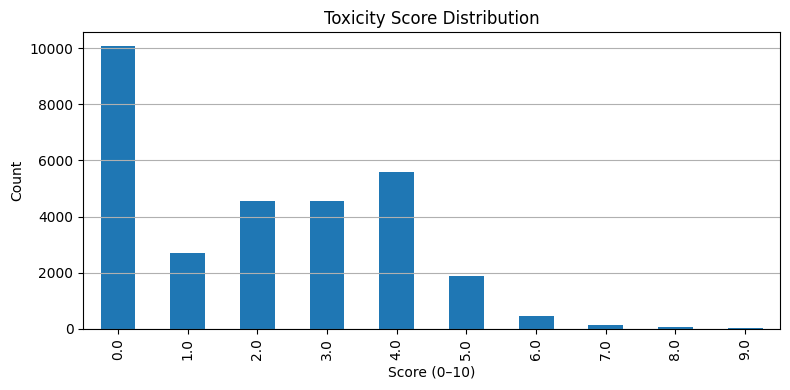

In [56]:
# Ensure clean numeric score
df_cleaned["note_numeric"] = df_cleaned["note"].str.extract(r"(\d+)/10").astype(float)

plt.figure(figsize=(8, 4))
df_cleaned["note_numeric"].value_counts().sort_index().plot(kind="bar")
plt.title("Toxicity Score Distribution")
plt.xlabel("Score (0–10)")
plt.ylabel("Count")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Average Toxicity by Category (flattened)

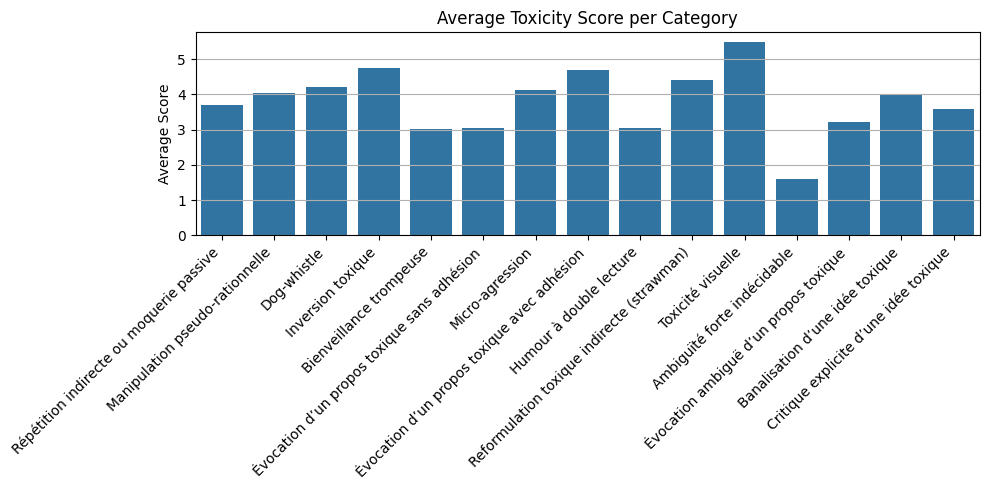

In [57]:
flat_cats = [cat for lst in df_cleaned["categorie_list"] if isinstance(lst, list) for cat in lst]
cat_scores = {cat: [] for cat in set(flat_cats)}

for _, row in df_cleaned.iterrows():
    if isinstance(row["categorie_list"], list):
        for cat in row["categorie_list"]:
            cat_scores[cat].append(row["note_numeric"])

avg_cat_scores = {cat: sum(scores)/len(scores) for cat, scores in cat_scores.items()}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(avg_cat_scores.keys()), y=list(avg_cat_scores.values()))
plt.title("Average Toxicity Score per Category")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Label Code Frequencies

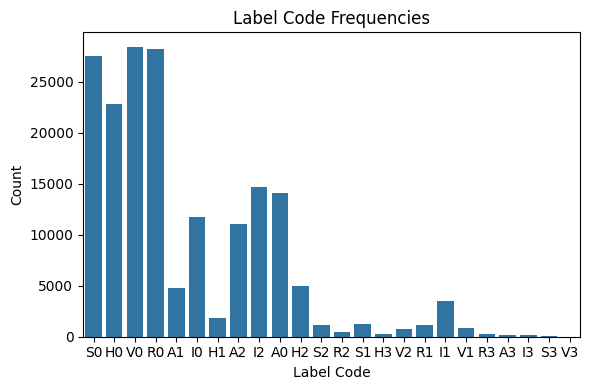

In [58]:
flat_labels = [label for sublist in df_cleaned["labels_list"] if isinstance(sublist, list) for label in sublist]
label_counts = Counter(flat_labels)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Code Frequencies")
plt.ylabel("Count")
plt.xlabel("Label Code")
plt.tight_layout()
plt.show()

### Top Category Combinations

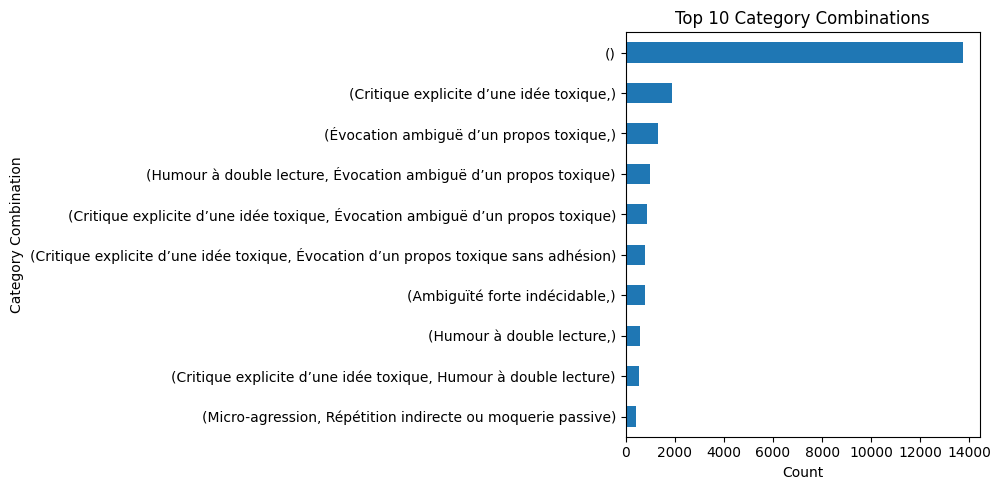

In [59]:
combo_counts = df_cleaned["categorie_list"].apply(lambda x: tuple(sorted(x)) if isinstance(x, list) else ()).value_counts().head(10)
plt.figure(figsize=(10, 5))
combo_counts.plot(kind="barh")
plt.title("Top 10 Category Combinations")
plt.xlabel("Count")
plt.ylabel("Category Combination")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()